1. I think that deep neural networks will definitely be used and useful well into the future, but I also don't think that they will live up to the hype about them. I don't think we will get to the point of an AI singularity or any such thing anytime soon, even though deep networks were supposedly going to get us there in the near future. (See the buzz about books like this: https://en.wikipedia.org/wiki/The_Singularity_Is_Near)
They are obviously very potent tools for analyzing data of varying kinds, but the don't appear capable of much more than that. Sure, they can almost effortlessly model and appear to "understand" things that were previously too complicated and involved to model, they thrive off of having access to unimaginably large quantities of data (rather than such amounts of data paralyzing them, as has happened with prior, brittle models), but they can't independently interpret their own results, and will never be able to. Interpretation is a human activity, and any interpretation apparently done by a program was set up and structured and pre-determined by a human being.
I guess the answer to your question is that they really are a breakthrough at a certain level, but not at the level that we want them to be (or are afraid they are). They will be used far into the future (although of course them and their usage will grow and change during that time as well) unlike expert systems, but like expert systems, many will be ultimately disappointed by their capabilities. At the end of the day I believe that no neural network, however complicated, will bear more than a cursory resemblance to a human brain, simply because human brains do not run on silicon.

See picture in this folder for part 2 of the homework

In [8]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


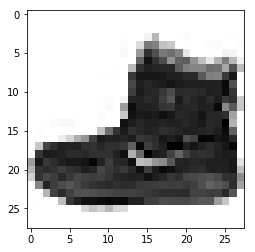

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

digit_image = train_images[0]
plt.imshow(digit_image, cmap=plt.cm.binary)

In [10]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') /255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [43]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(32, activation='relu', input_shape=(16*16,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
network.fit(train_images, train_labels, epochs=30, batch_size=512)

Epoch 1/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.0271 - acc: 0.9913
Epoch 2/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.0256 - acc: 0.9915
Epoch 3/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.0260 - acc: 0.9915
Epoch 4/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.0248 - acc: 0.9913
Epoch 5/30
60000/60000 [==============================] - 1s 10us/step - loss: 0.0250 - acc: 0.9915
Epoch 6/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.0288 - acc: 0.9909
Epoch 7/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.0261 - acc: 0.9913
Epoch 8/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.0260 - acc: 0.9914
Epoch 9/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.0236 - acc: 0.9922
Epoch 10/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.0285 - acc: 0.9909
Epoch 11

In [56]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 13us/step
test_acc: 0.8904


NOTE: While this is my most performant network, at just under 90% accuracy, I am almost certainly overfitting, especially since I didn't do anything like data augmentation and such.